### **Importing required libraries**

In [17]:
# import thr required libraries

import numpy as np
import pandas as pd
import os
import cv2 as cv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras

from keras.src.legacy.preprocessing.image import ImageDataGenerator

from keras.src.models import Sequential
from keras.src.optimizers import Adam

from keras.src.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D



# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
# from tensorflow.keras.layers import Conv2D, MaxPooling2D
# from tensorflow.keras.optimizers import Adam

### **Training Dataset**

In [3]:
# Dataset: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign?resource=download

train_set = './Data/Train'
test_set = './Data/Test'

num_classes = len(os.listdir(train_set)) # number of training classes in dataset (42)
num_classes

43

### **Load images from Dataset**

In [5]:
img_data =[]
img_labels = []
 
for index in range(num_classes):
    path = os.path.join('Data', 'Train', str(index))    
    image_names = os.listdir(path)
    
    for image in image_names:
        img = cv.imread(path + '/' + image, cv.IMREAD_COLOR)
        img = np.array(cv.resize(img, (32,32))) 

        img_data.append(img)
        img_labels.append(index)

### **Preprocessing the images**

In [7]:
# lets convert above created list into numpy arrays that helps to model to training

img_data = np.array(img_data)
img_labels = np.array(img_labels)

print(img_data.shape, img_labels.shape)

(39209, 32, 32, 3) (39209,)


In [8]:
# Split into training and validation data - 67% training and 33% validation

train_x, val_x, train_y, val_y = train_test_split(img_data, img_labels, test_size=0.33, random_state=42, shuffle=True)
train_x = train_x / 255 
val_x = val_x / 255

print("train_x.shape", train_x.shape)
print("val_x.shape", val_x.shape)
print("train_y.shape", train_y.shape)
print("val_y.shape", val_y.shape)

train_x.shape (26270, 32, 32, 3)
val_x.shape (12939, 32, 32, 3)
train_y.shape (26270,)
val_y.shape (12939,)


In [9]:

# This function returns a matrix of binary values (either ‘1’ or ‘0’). It has number of rows equal to the length of
# the input vector and number of columns equal to the number of classes.
train_y = tf.keras.utils.to_categorical(train_y, num_classes=num_classes)
val_y = tf.keras.utils.to_categorical(val_y, num_classes=num_classes)

print("train_y.shape", train_y.shape)
print("val_y.shape", val_y.shape)

train_y.shape (26270, 43)
val_y.shape (12939, 43)


### **Augmenting the image data**

In [ ]:
aug_data = ImageDataGenerator(
        rotation_range = 10,
        zoom_range = 0.15,
        width_shift_range = 0.1,
        height_shift_range = 0.1,
        shear_range = 0.15,
        horizontal_flip = False,
        vertical_flip = False,
        fill_mode = "nearest"
    )

### **Build the Model**

In [20]:
model = Sequential()

model.add(Conv2D(16, (3, 3), activation = "relu", input_shape=(32,32,3)))
model.add(Conv2D(32, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size=(2, 2))) # maxpooling to reduce the dimentions
model.add(Dropout(rate=0.25)) # Add dropout to prevent overfitting 


model.add(Conv2D(64, (3, 3), activation = "relu"))
model.add(Conv2D(128, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25)) # Add dropout to prevent overfitting 


# Flatten serves as a connection between the convolution and dense layers. 
model.add(Flatten()) 
model.add(Dense(512, activation = "relu"))
model.add(Dropout(rate=0.5)) # Add dropout to prevent overfitting 

# since we have 43 classes add dense with 43 
model.add(Dense(43, activation = "softmax"))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 10, 10, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     1,638,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 43)             │        22,059 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,758,411 (6.71 MB)

 Trainable params: 1,758,411 (6.71 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# train the model

model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),metrics=["accuracy"])
history = model.fit(aug_data.flow(train_x, train_y, batch_size=50), epochs = 50, validation_data = (val_x,val_y))

Epoch 1/50


d:\Git\Traffic Sign Smart Detector\env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
d:\Git\Traffic Sign Smart Detector\env\Lib\site-packages\keras\src\backend\tensorflow\nn.py:666: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


526/526 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.2116 - loss: 2.9089 - val_accuracy: 0.8500 - val_loss: 0.5792
Epoch 2/50
526/526 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.7222 - loss: 0.8432 - val_accuracy: 0.9642 - val_loss: 0.1347
Epoch 3/50
526/526 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - accuracy: 0.8765 - loss: 0.3840 - val_accuracy: 0.9898 - val_loss: 0.0537
Epoch 4/50
526/526 ━━━━━━━━━━━━━━━━━━━━ 35s 67ms/step - accuracy: 0.9242 - loss: 0.2448 - val_accuracy: 0.9944 - val_loss: 0.0238
Epoch 5/50
526/526 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.9423 - loss: 0.1822 - val_accuracy: 0.9952 - val_loss: 0.0186
Epoch 6/50
526/526 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.9525 - loss: 0.1485 - val_accuracy: 0.9968 - val_loss: 0.0134
Epoch 7/50
526/526 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.9648 - loss: 0.1143 - val_accuracy: 0.9974 - val_loss: 0.0109
Epoch 8/50
526/526 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - accuracy: 0.9663 - loss: 0.1070 - val_accurac

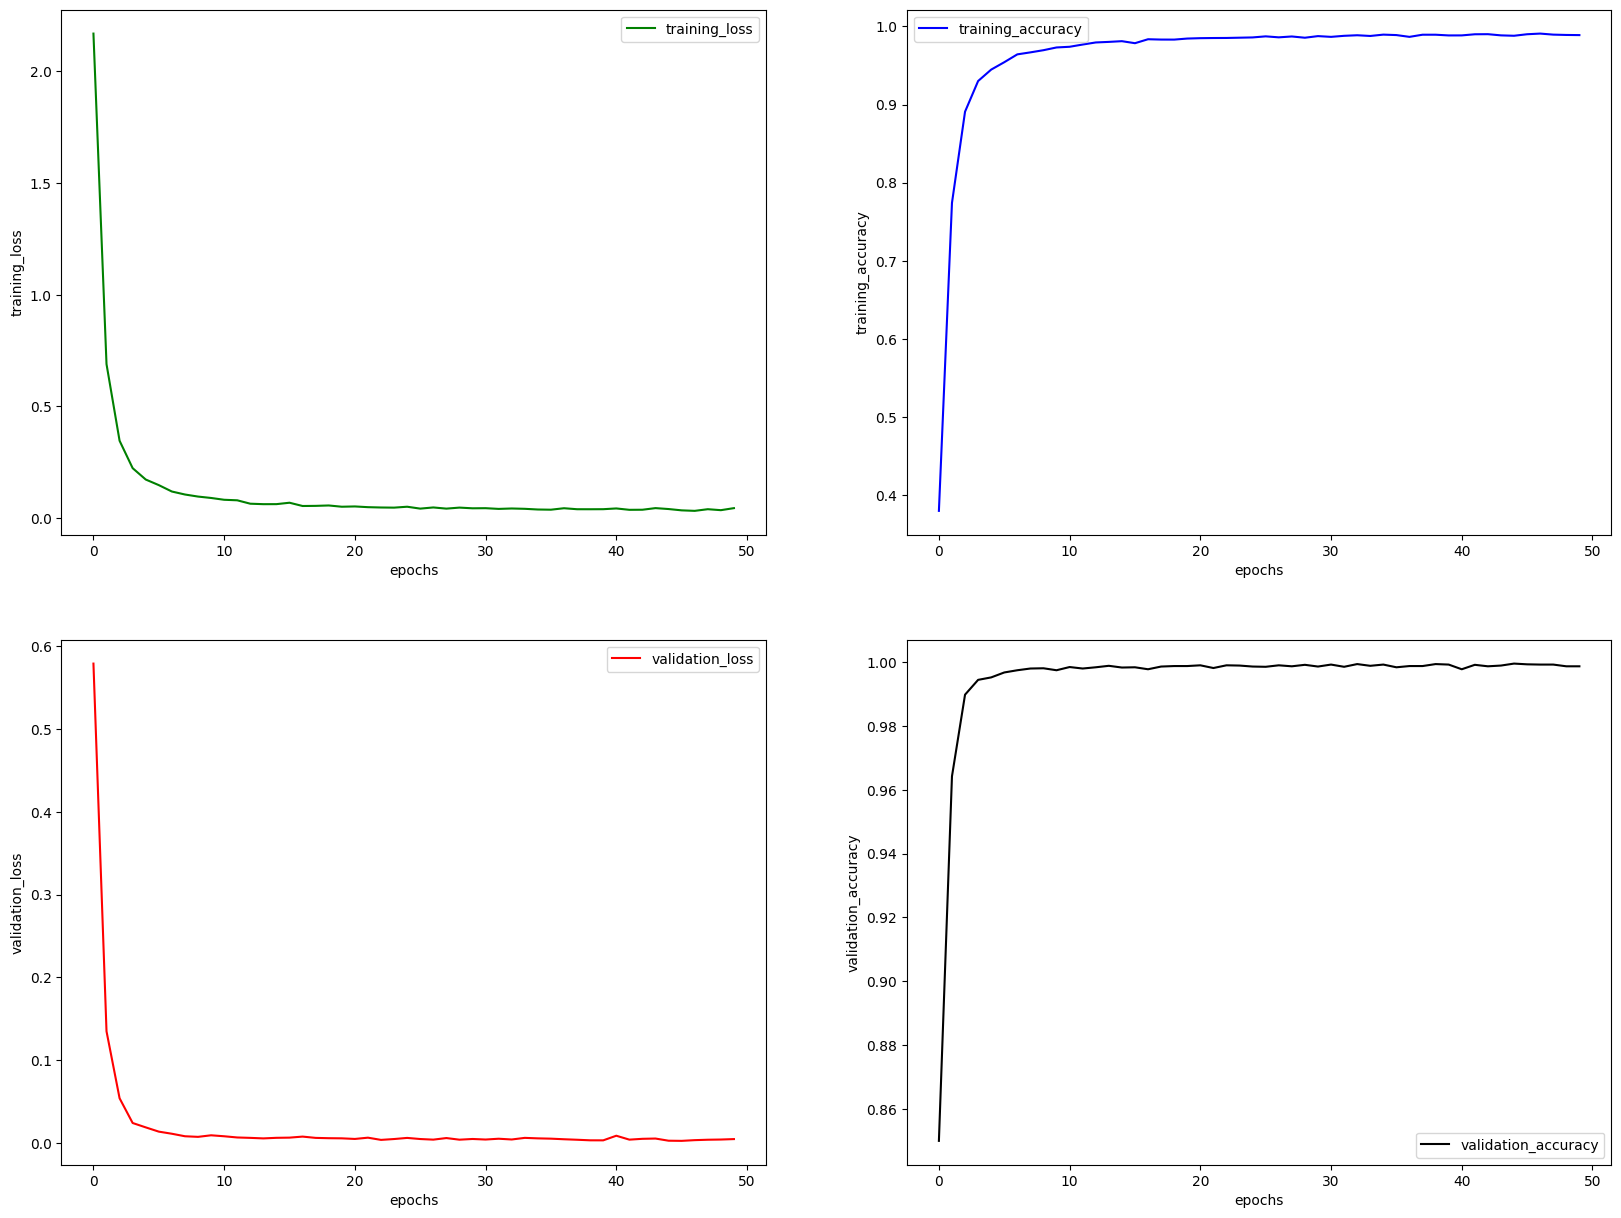

In [22]:
# Plot the lozzes and accuracies

training_loss, training_accuracy, validation_loss, validation_accuracy = (history.history['loss'], history.history['accuracy'], history.history['val_loss'], history.history['val_accuracy'])
fig, axes = plt.subplots(2,2, figsize = (20,15))

axes[0][0].plot(training_loss, color="green")  
axes[0][0].set_xlabel("epochs")
axes[0][0].set_ylabel("training_loss")
axes[0][0].legend(['training_loss'])



#===============================================

axes[0][1].plot(training_accuracy,color="blue")  
axes[0][1].set_xlabel("epochs")
axes[0][1].set_ylabel("training_accuracy")
axes[0][1].legend(['training_accuracy'])

#===============================================

axes[1][0].plot(validation_loss,color="red")  
axes[1][0].set_xlabel("epochs")
axes[1][0].set_ylabel("validation_loss")
axes[1][0].legend(['validation_loss'])

#===============================================

axes[1][1].plot(validation_accuracy,color="black")  
axes[1][1].set_xlabel("epochs")
axes[1][1].set_ylabel("validation_accuracy")
axes[1][1].legend(['validation_accuracy'])

plt.show()


In [24]:
# Save the model
model.save("./traffic_sign_recognition_model.h5")